SVC(gamma=0.001)的分类结果
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


混淆矩阵
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  

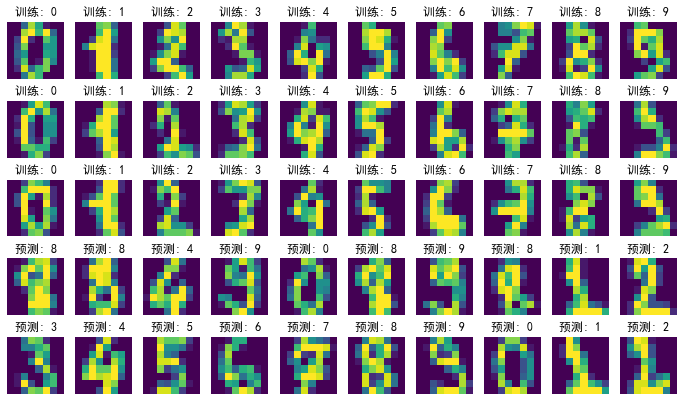

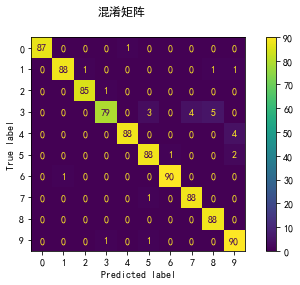

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
data = digits.images.reshape((len(digits.images), -1))
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

clf = svm.SVC(gamma=0.001)
clf.fit(X_train, y_train)  # 训练
predicted = clf.predict(X_test)  # 预测

figure = plt.figure(figsize=(12, 7))
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

with plt.style.context('Solarize_Light2'):

    for i in range(30):
        ax = plt.subplot(5, 10, i+1)
        ax.set_axis_off()
        ax.imshow(digits.images[i], interpolation='nearest')
        ax.set_title('训练: %i' % digits.target[i], fontdict={'fontsize': 12})

    for i in range(20):
        ax = plt.subplot(5, 10, i+31)
        ax.set_axis_off()
        ax.imshow(X_test[i].reshape(8, 8), interpolation='nearest')
        ax.set_title('预测: %i' % predicted[i], fontdict={'fontsize': 12})

print(f"{clf}的分类结果\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("混淆矩阵")
print(f"混淆矩阵\n{disp.confusion_matrix}")

plt.tight_layout()
plt.show()
